In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from dl_biology.helper import aa_encoder
import jax
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# import data first
filepath = "/Users/tungvuduc/Desktop/PhD/projects/repos/Deep-learning-for-biology/data/kaggle/peptide-lc-retention-time-prediction/test.csv"
test_data = pd.read_csv(filepath)

filepath = "/Users/tungvuduc/Desktop/PhD/projects/repos/Deep-learning-for-biology/data/kaggle/peptide-lc-retention-time-prediction/train.csv"
train_data = pd.read_csv(filepath)
X_train = train_data[["PeptideSequence", "Modifications"]].iloc[:8000]
y_train = train_data[["RetentionTime"]].iloc[:8000]

X_val = train_data[["PeptideSequence", "Modifications"]].iloc[8000:]
y_val = train_data[["RetentionTime"]].iloc[8000:].values

In [3]:
# lets create a vocab
vocab = set(list(train_data["PeptideSequence"].sum()))

# collect all PeptideSequences and encode them
encoded_pep_seq_train = [aa_encoder(peptide, vocab) for peptide in X_train["PeptideSequence"]]
encoded_pep_seq_val = [aa_encoder(peptide, vocab) for peptide in X_val["PeptideSequence"]]

# creat train and val
one_hot_train = np.array([jax.nn.one_hot(encoded, num_classes=len(vocab)).sum(axis=0) for encoded in encoded_pep_seq_train])
one_hot_val = np.array([jax.nn.one_hot(encoded, num_classes=len(vocab)).sum(axis=0) for encoded in encoded_pep_seq_val])

scaler = StandardScaler()
one_hot_train_std = scaler.fit_transform(one_hot_train)
one_hot_val_std = scaler.fit_transform(one_hot_val)

Pearon corr:  0.9165571609186889
MAE 13.703116812321227


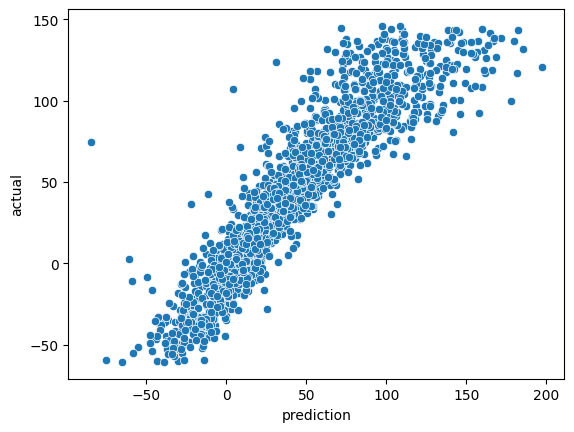

In [4]:
model = LinearRegression()
model.fit(one_hot_train_std, y_train)
y_pred = model.predict(one_hot_val_std)

sns.scatterplot(
    x=y_pred[:, 0],
    y=y_val[:, 0]
)
plt.xlabel("prediction")
plt.ylabel("actual")
print("Pearon corr: ", np.corrcoef(y_pred[:, 0], y_val[:, 0])[0, -1])
def mae(y_pred, y):
    return np.mean(np.abs(y_pred -y))
print(f"MAE {mae(y_pred[:, 0], y_val[:, 0])}")